In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from rnn_scratch import *
from lstm_scratch import *

In [11]:
def generate_sine_wave(seq_length, num_samples, freq=1.0):
    """Generate a dataset of sine waves."""
    x = np.linspace(0, 10*np.pi*freq, seq_length)
    data = np.sin(x)
    
    # Create multiple samples with different phases
    all_data = []
    for i in range(num_samples):
        phase = np.random.uniform(0, 2*np.pi)
        all_data.append(np.sin(x + phase))
    
    return np.array(all_data).reshape(num_samples, seq_length, 1).astype(np.float32)

In [ ]:
def test_rnn_forward_pass():
    """Test the forward pass of the RNN."""
    batch_size = 8
    seq_length = 50
    input_size = 1
    hidden_size = 32
    num_layers = 2
    
    # Generate sample data
    X = torch.tensor(generate_sine_wave(seq_length, batch_size))
    
    # Create model
    model = RNNBackbone(input_size, hidden_size, num_layers)
    
    # Forward pass
    hidden_states = model(X)
    
    # Print shapes for verification
    print(f"Input shape: {X.shape}")
    for i, h in enumerate(hidden_states):
        print(f"Layer {i+1} hidden states shape: {h.shape}")
    
    return X, hidden_states

In [13]:
def plot_results(X, hidden_states):
    """Plot the input sequence and some of the hidden state activations."""
    # Take the first sample in the batch
    sample_idx = 0
    
    plt.figure(figsize=(12, 8))
    
    # Plot input
    plt.subplot(3, 1, 1)
    plt.plot(X[sample_idx, :, 0].numpy())
    plt.title('Input Sequence')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    
    # Plot hidden states from first layer
    plt.subplot(3, 1, 2)
    hidden_first_layer = hidden_states[0][sample_idx].detach().numpy()
    # Plot first 5 hidden units
    for i in range(min(5, hidden_first_layer.shape[1])):
        plt.plot(hidden_first_layer[:, i], label=f'Unit {i+1}')
    plt.title('Layer 1 Hidden States (First 5 Units)')
    plt.xlabel('Time Step')
    plt.ylabel('Activation')
    plt.legend()
    
    # Plot hidden states from last layer
    plt.subplot(3, 1, 3)
    hidden_last_layer = hidden_states[-1][sample_idx].detach().numpy()
    # Plot first 5 hidden units
    for i in range(min(5, hidden_last_layer.shape[1])):
        plt.plot(hidden_last_layer[:, i], label=f'Unit {i+1}')
    plt.title(f'Layer {len(hidden_states)} Hidden States (First 5 Units)')
    plt.xlabel('Time Step')
    plt.ylabel('Activation')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [14]:
def test_rnn_with_different_params():
    """Test the RNN with different parameters."""
    # Test 1: Single-layer RNN
    print("\nTest 1: Single-layer RNN")
    model1 = RNNBackbone(input_size=1, hidden_size=16, num_layers=1)
    print(f"Model parameters: {sum(p.numel() for p in model1.parameters())}")
    
    # Test 2: Multi-layer RNN
    print("\nTest 2: Multi-layer RNN")
    model2 = RNNBackbone(input_size=1, hidden_size=16, num_layers=3)
    print(f"Model parameters: {sum(p.numel() for p in model2.parameters())}")
    
    # Test 3: Larger hidden size
    print("\nTest 3: Larger hidden size")
    model3 = RNNBackbone(input_size=1, hidden_size=64, num_layers=2)
    print(f"Model parameters: {sum(p.numel() for p in model3.parameters())}")

Testing RNN forward pass...
Input shape: torch.Size([8, 50, 1])
Layer 1 hidden states shape: torch.Size([8, 50, 32])
Layer 2 hidden states shape: torch.Size([8, 50, 32])

Plotting results...


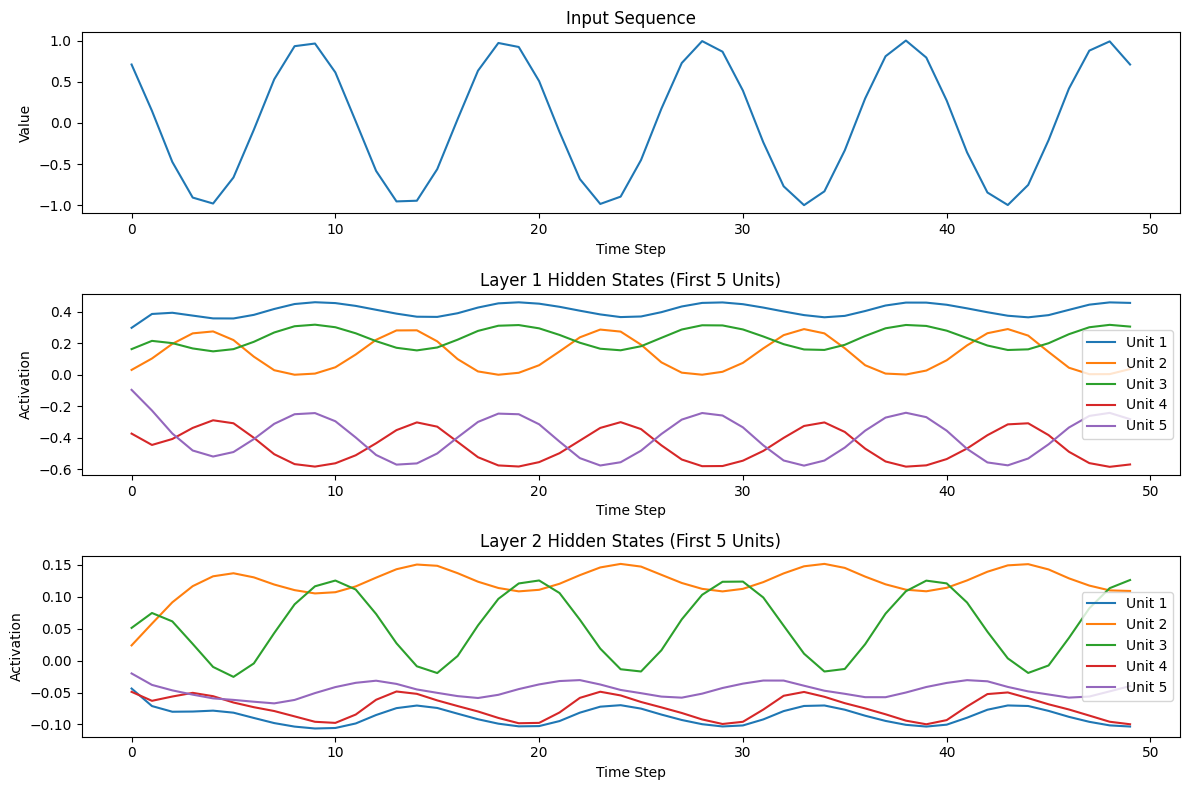


Testing RNN with different parameters...

Test 1: Single-layer RNN
Model parameters: 304

Test 2: Multi-layer RNN
Model parameters: 1392

Test 3: Larger hidden size
Model parameters: 12608

Testing RNN cell with LayerNorm...
Without LayerNorm: mean=0.0035, std=0.6756
With LayerNorm: mean=-0.0273, std=0.6450


In [15]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("Testing RNN forward pass...")
X, hidden_states = test_rnn_forward_pass()

print("\nPlotting results...")
plot_results(X, hidden_states)

print("\nTesting RNN with different parameters...")
test_rnn_with_different_params()

# Optional: Test with LayerNorm
print("\nTesting RNN cell with LayerNorm...")
input_size = 1
hidden_size = 32

# Create sample input
x_t = torch.randn(4, input_size)  # batch_size=4
h_prev = torch.randn(4, hidden_size)

# Test without LayerNorm
cell1 = RNNCell(input_size, hidden_size, use_norm=False)
out1 = cell1(x_t, h_prev)

# Test with LayerNorm
cell2 = RNNCell(input_size, hidden_size, use_norm=True)
out2 = cell2(x_t, h_prev)

print(f"Without LayerNorm: mean={out1.mean().item():.4f}, std={out1.std().item():.4f}")
print(f"With LayerNorm: mean={out2.mean().item():.4f}, std={out2.std().item():.4f}")
